In [1]:
%matplotlib inline
import torch
import torch.nn as nn
from torchvision import datasets
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
import random

## Generate Spectrograms
Basically convert a .wav or .mp3

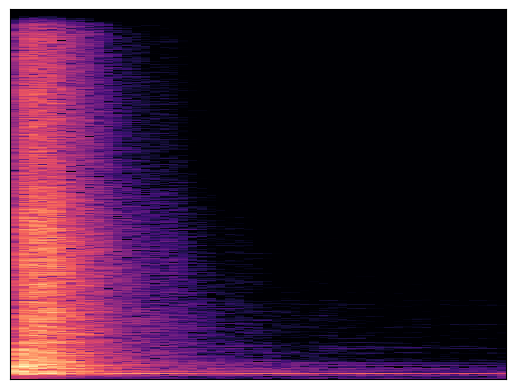

In [2]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt



# Path to the audio file
file_path = "Sounds/Snares/snare_001.wav"

# Check if the file exists
if not os.path.exists(file_path):
    print("File not found:", file_path)
    exit()

# Load the audio file
y, sr = librosa.load(file_path)

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convert the amplitude spectrogram to decibels
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram without axis labels or scales
librosa.display.specshow(D_db, sr=sr, x_axis=None, y_axis=None)

# Save the spectrogram as a PNG file
output_dir = "Spectrograms/Snares"
output_file = os.path.join(output_dir, "spectrogram.png")
plt.savefig(output_file, bbox_inches='tight', pad_inches=0)

plt.show()


## Generate spectrograms for the first second
A spectrogram of fixed time length is computed for each audio file

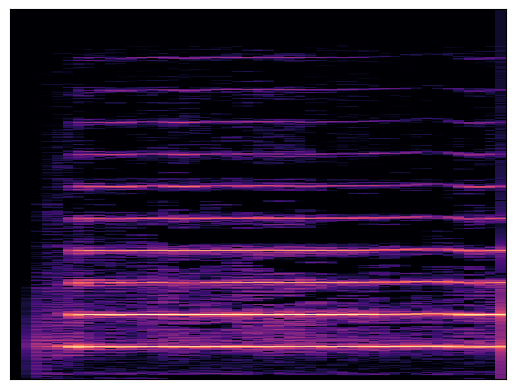

In [4]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Path to the audio file
# file_path = "C:/Users/pilla/Desktop/Git/4114_Project/EEE4114F-Project/Sounds/Snares/3147__robbiesurp__dm_snare_ringger.wav"
file_path = "Sounds/Trumpet/trumpet_003.mp3"

# Check if the file exists
if not os.path.exists(file_path):
    print("File not found:", file_path)
    exit()

# Load the audio file
y, sr = librosa.load(file_path, sr=None)

# Take only the first second of the audio
y_first_second = y[:sr]

# Compute the Short-Time Fourier Transform (STFT) of the first second
D = librosa.stft(y_first_second)

# Convert the amplitude spectrogram to decibels
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram without axis labels or scales
librosa.display.specshow(D_db, sr=sr, x_axis=None, y_axis=None)

# Save the spectrogram as a PNG file
output_dir = "Spectrograms/Trumpet"
output_file = os.path.join(output_dir, "spectrogram_first_second.png")
plt.savefig(output_file, bbox_inches='tight', pad_inches=0)

plt.show()
